# Gini Gain Example

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [13]:
def gen_data(n_samples = 80):
    random_weight = lambda n=1,mu=150,st=30: np.random.randn(n)*st + mu
    weights = np.array([150,200]) 
    prob_apple = 0.4 
    
    labels = np.int32(np.random.rand(n_samples) > prob_apple)
    weights = np.array([random_weight(mu=weights[l]) for l in labels]).reshape(-1)
    
    return weights, labels

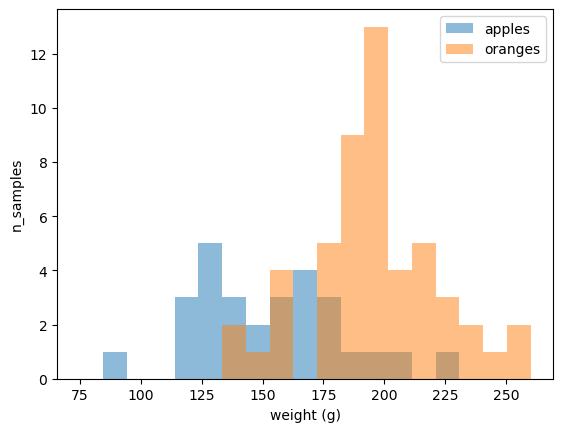

In [6]:
np.random.seed(25)

weights, labels = gen_data(n_samples = 80)

plt.hist(weights[labels==0],alpha=0.5,bins=np.linspace(75,260,20), label="apples");
plt.hist(weights[labels==1],alpha=0.5,bins=np.linspace(75,260,20), label='oranges');
plt.legend(loc='upper right');
plt.xlabel("weight (g)");
plt.ylabel("n_samples");

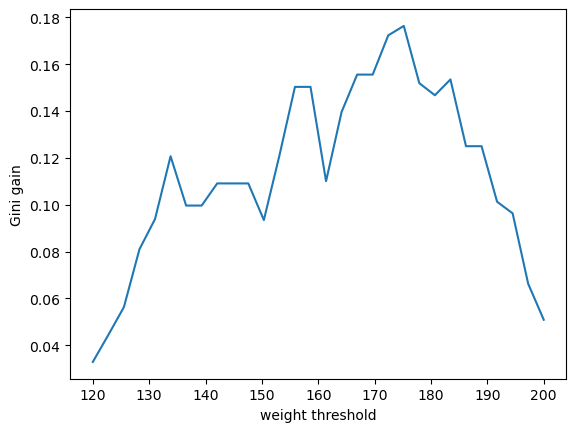

In [7]:
gini_imp = lambda labs: 1 - np.mean(labs==0)**2 - np.mean(labs==1)**2
gini_gain = lambda S, S1, S2: gini_imp(S) - (len(S1)/len(S))*gini_imp(S1) - (len(S2)/len(S))*gini_imp(S2)

thres = np.linspace(120,200,30) # decision thresholds

gains = [gini_gain(labels, labels[weights<th], labels[weights>th]) for th in thres]

plt.plot(thres,gains);
plt.xlabel("weight threshold")
plt.ylabel("Gini gain");

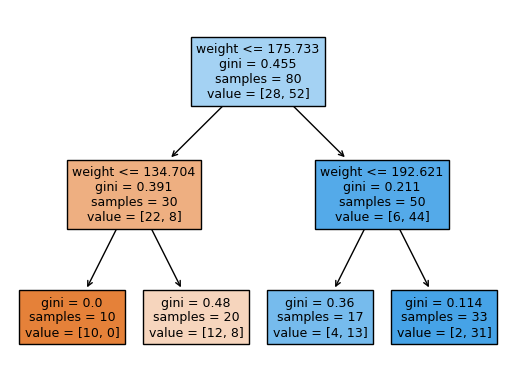

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(max_depth=2, random_state=25)
dtc.fit(weights.reshape(-1,1), labels)

tree.plot_tree(dtc, filled=True, fontsize=9, feature_names=["weight"]);

# Use Wine Quality Dataset

In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the wine quality dataset
wine_data = pd.read_csv('winequality-red.csv', sep=';')

# Convert quality to binary (good/bad) - consider good if quality >= 6
wine_data['quality_binary'] = (wine_data['quality'] >= 6).astype(int)

# Select features and target variable
X = wine_data[['alcohol', 'sulphates', 'volatile acidity']]  # Example features
y = wine_data['quality_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create a decision tree classifier

In [19]:
dt_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Make predictions on the train set
y_pred_train = dt_classifier.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.99687255668491
Test Accuracy: 0.725


Discuss the result 

## Plot the decision tree

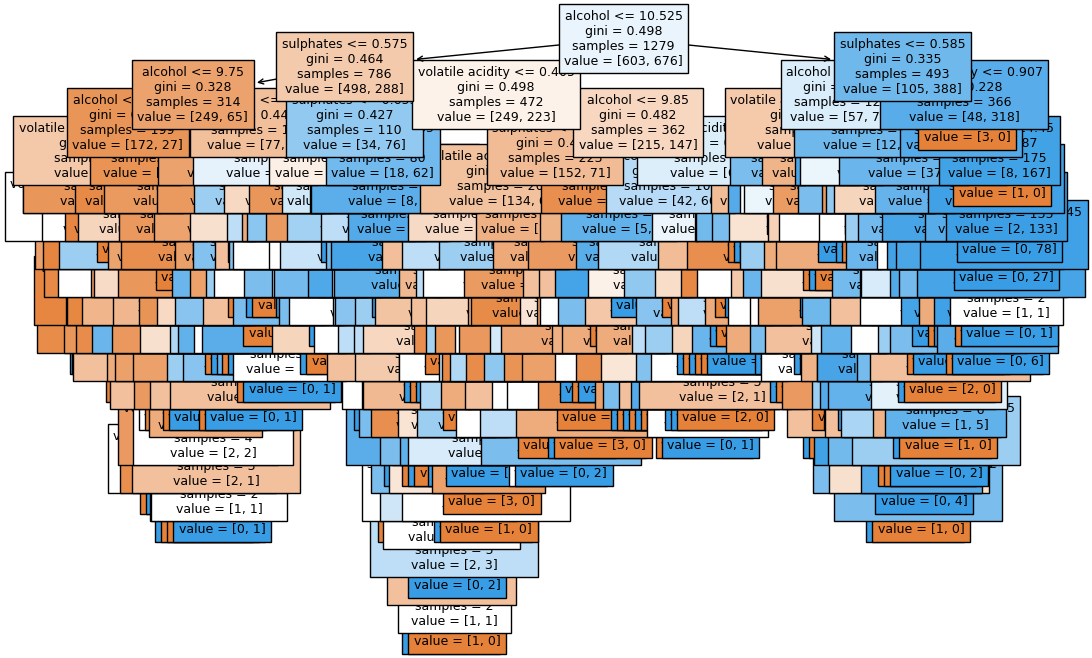

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))  # Adjust figure size if needed
plot_tree(dt_classifier, 
          filled=True, 
          fontsize=9, 
          feature_names=X.columns)  # Use X.columns to get all feature names
plt.show()

In [20]:
# Get the number of leaf nodes
n_leaves = dt_classifier.get_n_leaves()
print(f"Number of leaf nodes: {n_leaves}")

# Get the depth of the tree
depth = dt_classifier.get_depth()
print(f"Depth of the tree: {depth}")

# Get the total number of nodes
n_nodes = dt_classifier.tree_.node_count
print(f"Total number of nodes: {n_nodes}")

Number of leaf nodes: 352
Depth of the tree: 21
Total number of nodes: 703


## How to mitigate the overfitting? 

### Pre-Pruning (Early Stopping)

max_depth: 

Limit the maximum depth of the tree. 
This prevents the tree from growing too deep and capturing noise in the data.   

min_samples_split: 

Specify the minimum number of samples required to split an internal node. 
A higher value prevents splitting on small, potentially noisy subsets.   

min_samples_leaf: 

Specify the minimum number of samples required to be at a leaf node. 
This ensures that leaves represent a sufficient number of samples and are not overly specific to individual instances.   

max_leaf_nodes: 

Limit the maximum number of leaf nodes in the tree.

In [22]:
dt_classifier = DecisionTreeClassifier(random_state=42, 
                                    max_depth=5, 
                                    min_samples_split=10, 
                                    min_samples_leaf=5)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Make predictions on the train set
y_pred_train = dt_classifier.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.7834245504300235
Test Accuracy: 0.75


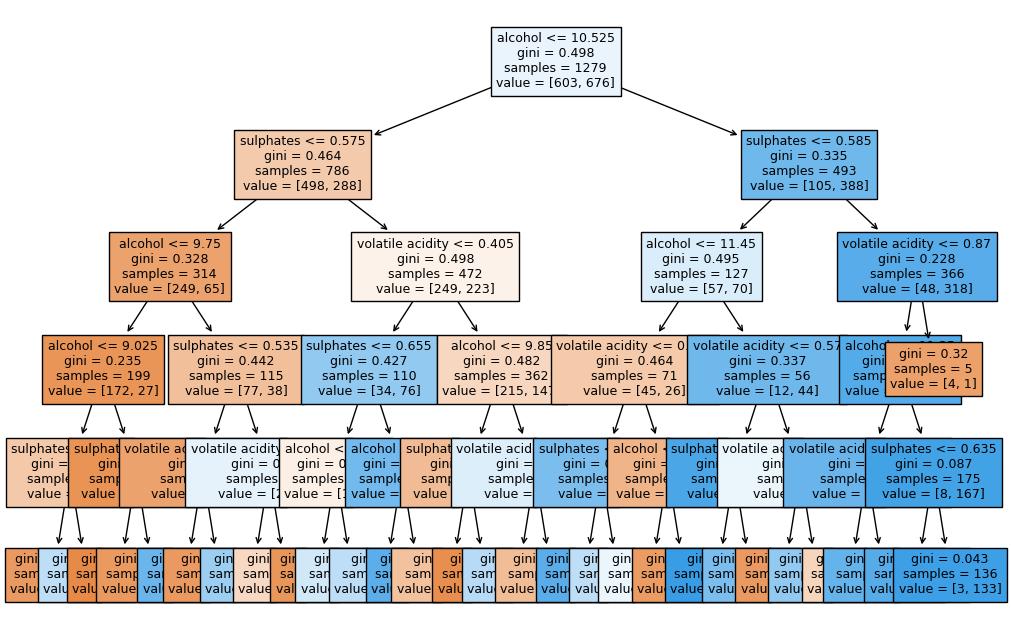

In [23]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))  # Adjust figure size if needed
plot_tree(dt_classifier, 
          filled=True, 
          fontsize=9, 
          feature_names=X.columns)  # Use X.columns to get all feature names
plt.show()

In [24]:
# Get the number of leaf nodes
n_leaves = dt_classifier.get_n_leaves()
print(f"Number of leaf nodes: {n_leaves}")

# Get the depth of the tree
depth = dt_classifier.get_depth()
print(f"Depth of the tree: {depth}")

# Get the total number of nodes
n_nodes = dt_classifier.tree_.node_count
print(f"Total number of nodes: {n_nodes}")

Number of leaf nodes: 29
Depth of the tree: 5
Total number of nodes: 57


# Ensemble Methods

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100) 
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Make predictions on the train set
y_pred_train = rf_classifier.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.99687255668491
Test Accuracy: 0.765625


## How to reduce the overfitting?

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42, 
                                    n_estimators=100, 
                                    max_depth=5, 
                                    min_samples_split=5, 
                                    min_samples_leaf=2, 
                                    max_features="sqrt") 
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Make predictions on the train set
y_pred_train = rf_classifier.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.7857701329163409
Test Accuracy: 0.728125


## Plot the first 5 trees

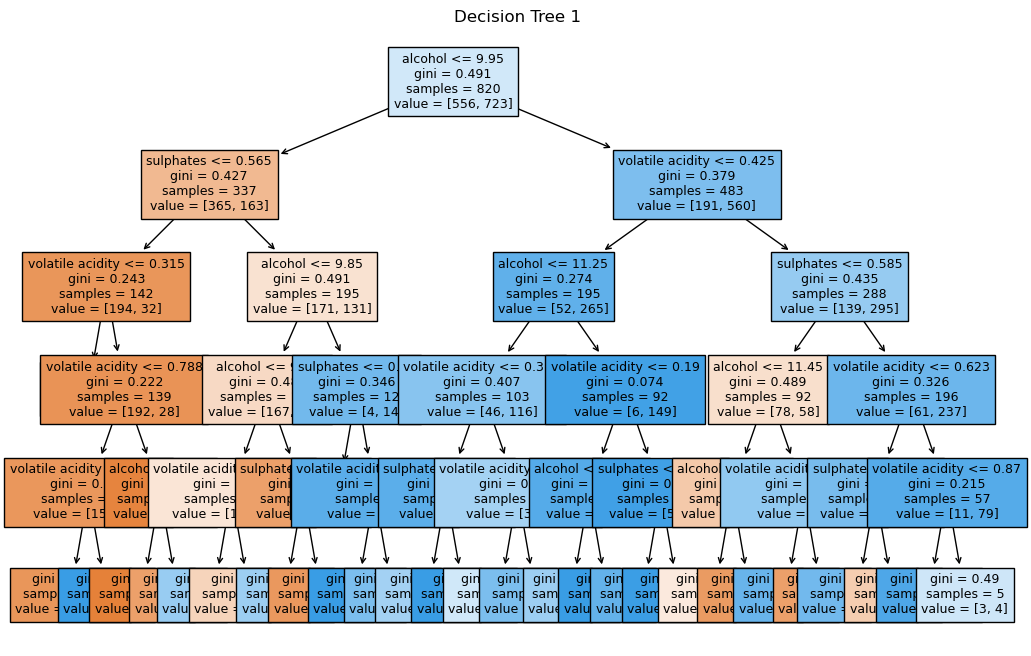

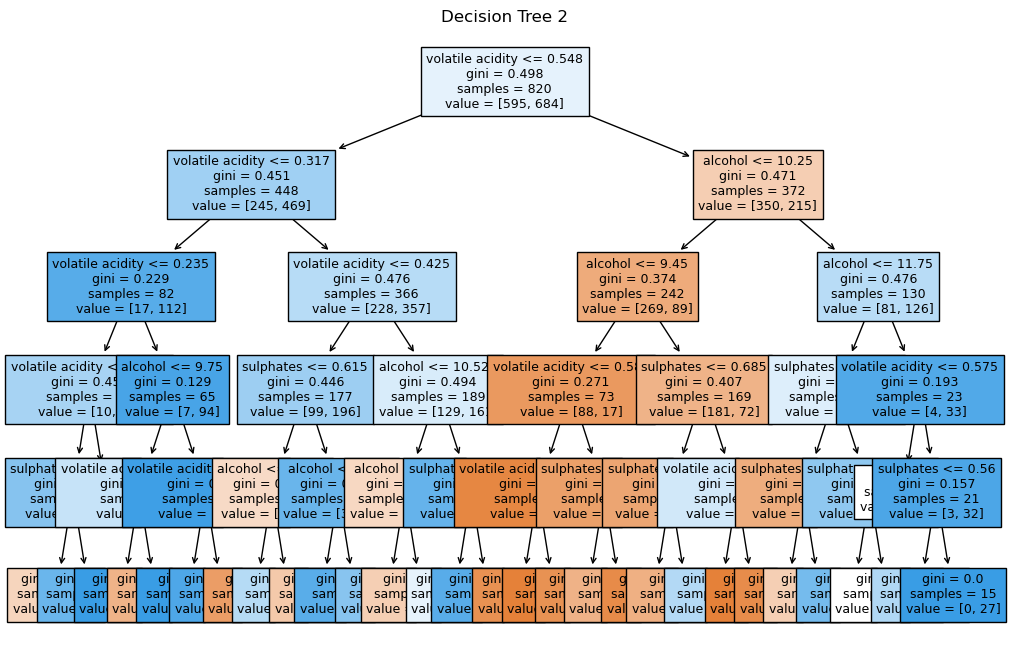

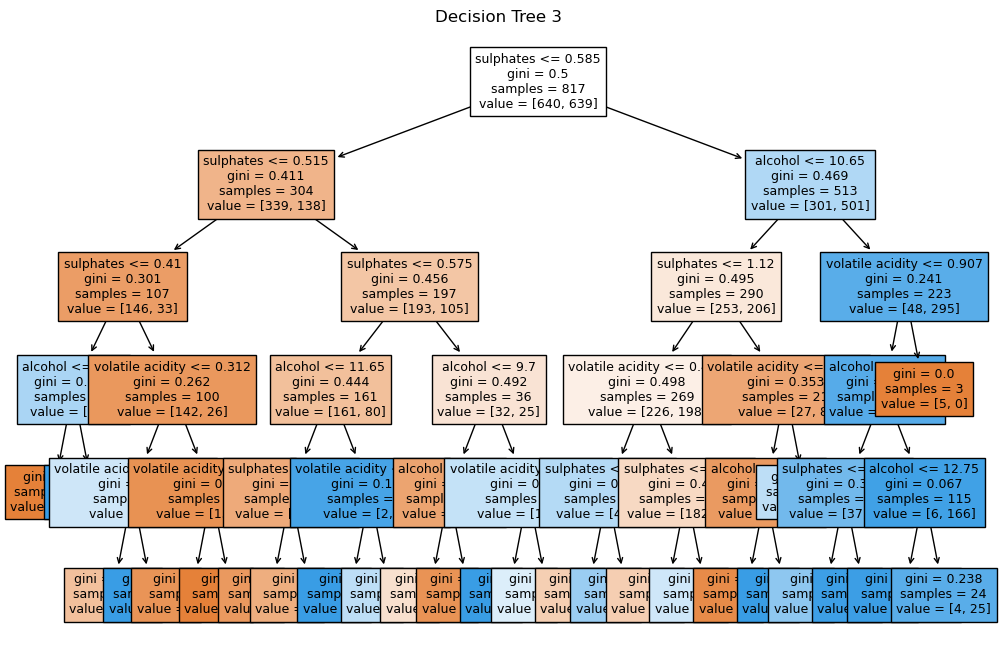

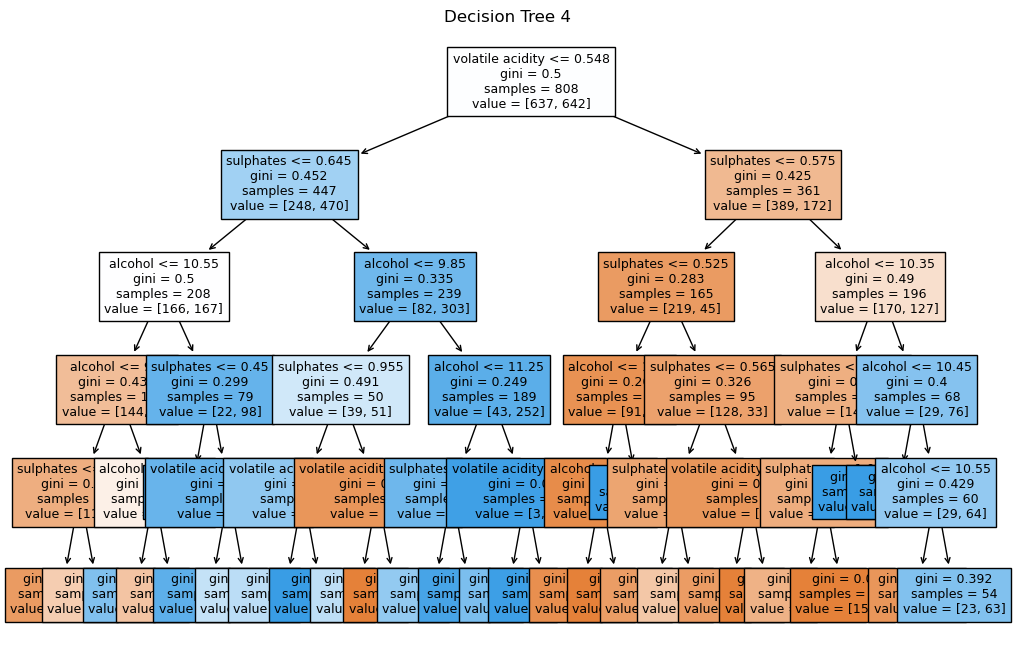

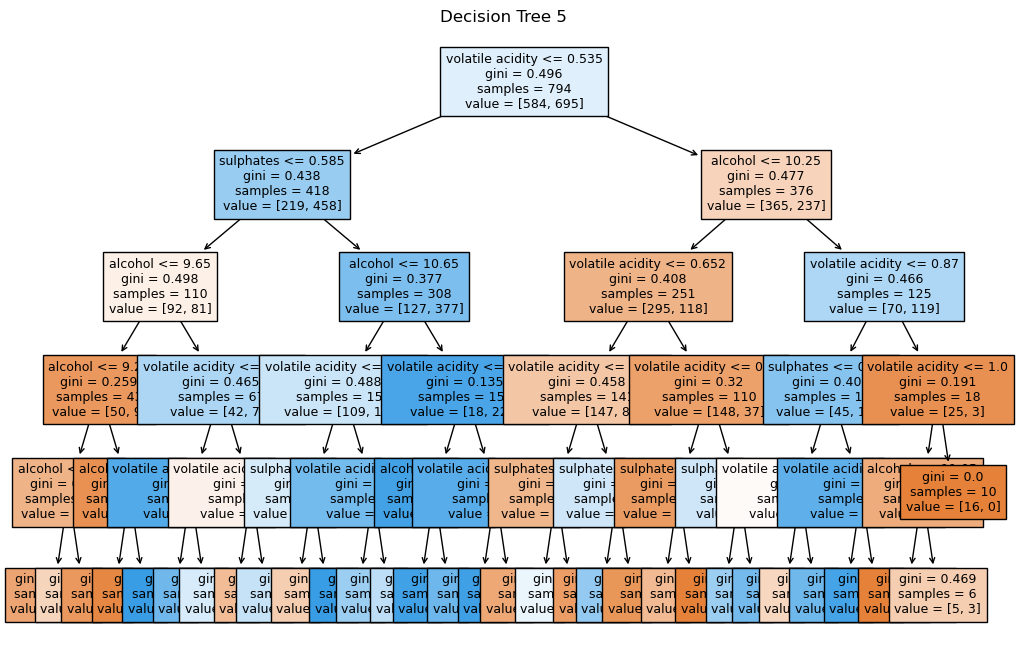

In [32]:
for i in range(5):
    plt.figure(figsize=(12, 8))
    plot_tree(rf_classifier.estimators_[i], 
              filled=True, 
              fontsize=9, 
              feature_names=X.columns)
    plt.title(f"Decision Tree {i+1}")
    plt.show()

##  How to Implement Bagging

In [33]:
from sklearn.ensemble import BaggingClassifier  # or BaggingRegressor
from sklearn.tree import DecisionTreeClassifier  # or another base estimator

# Create a Bagging classifier
bagging_classifier = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),  # Use your desired base model
    n_estimators=100,  # Number of base estimators (models)
    max_samples=1.0,  # Proportion of samples to draw from the training set
    max_features=1.0,  # Proportion of features to draw from the training set
    random_state=42
)

# Train the classifier
bagging_classifier.fit(X_train, y_train)


# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# Make predictions on the train set
y_pred_train = bagging_classifier.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.99687255668491
Test Accuracy: 0.765625


#  How to Implement AdaBoost

In [34]:
from sklearn.ensemble import AdaBoostClassifier  # or AdaBoostRegressor

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),  # Often use a weak learner
    n_estimators=50,  # Number of estimators
    learning_rate=1.0,  # Controls the contribution of each classifier
    random_state=42
)

# Train the classifier
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

# Make predictions on the train set
y_pred_train = adaboost_classifier.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.7576231430805317
Test Accuracy: 0.725


#  How to Implement XGBoost

In [37]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,  # Number of estimators
    learning_rate=0.1,  # Step size shrinkage used in update to prevents overfitting
    max_depth=3,  # Maximum depth of a tree
    objective='binary:logistic',  # Specify the learning task and the corresponding learning objective
    random_state=42
)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Make predictions on the train set
y_pred_train = xgb_classifier.predict(X_train)

# Evaluate the accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {accuracy_train}")

# Evaluate the accuracy
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Train Accuracy: 0.7967161845191556
Test Accuracy: 0.746875


# Use all the features of the dataset

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Load the wine quality dataset
wine_data = pd.read_csv('winequality-red.csv', sep=';')

# Convert quality to binary (good/bad) - consider good if quality >= 6
wine_data['quality_binary'] = (wine_data['quality'] >= 6).astype(int)

# Select all features
X = wine_data.drop(['quality', 'quality_binary'], axis=1)  # Use all features except the target variables
y = wine_data['quality_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# 2. Bagging
bagging_classifier = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Accuracy: {accuracy_bagging}")

# 3. AdaBoost
adaboost_classifier = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {accuracy_adaboost}")

# 4. XGBoost
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    objective='binary:logistic',
    random_state=42
)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

Random Forest Accuracy: 0.790625
Bagging Accuracy: 0.803125
AdaBoost Accuracy: 0.74375
XGBoost Accuracy: 0.753125


## Use all the classes

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the wine quality dataset
wine_data = pd.read_csv('winequality-red.csv', sep=';')

# Use the original 'quality' column with all classes
X = wine_data.drop('quality', axis=1)  # Use all features except the target variable
y = wine_data['quality']  # Use the original quality column with all classes

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# 2. Bagging
bagging_classifier = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Accuracy: {accuracy_bagging}")

# 3. AdaBoost
adaboost_classifier = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"AdaBoost Accuracy: {accuracy_adaboost}")

# 4. XGBoost
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    objective='multi:softmax',  # Use 'multi:softmax' for multi-class classification
    num_class=len(wine_data['quality'].unique()),  # Specify the number of classes
    random_state=42
)
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

Random Forest Accuracy: 0.659375
Bagging Accuracy: 0.6625
AdaBoost Accuracy: 0.528125
XGBoost Accuracy: 0.621875


# Create confusion matrices

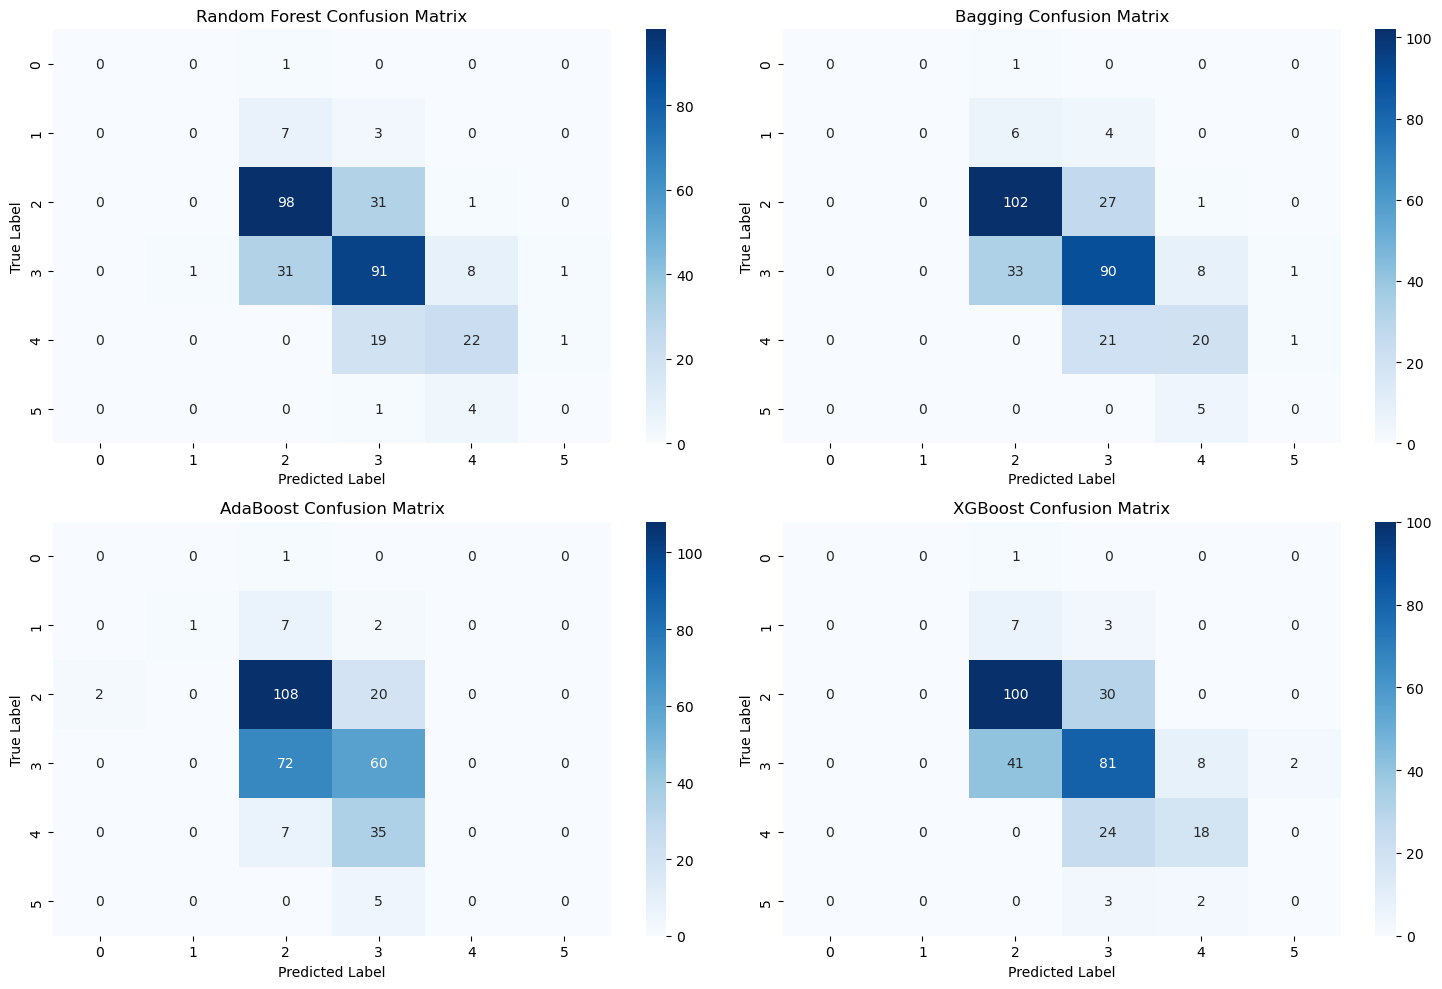

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrices
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(2, 2, 2)
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Blues')
plt.title('Bagging Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(2, 2, 3)
sns.heatmap(cm_adaboost, annot=True, fmt='d', cmap='Blues')
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(2, 2, 4)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()